In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

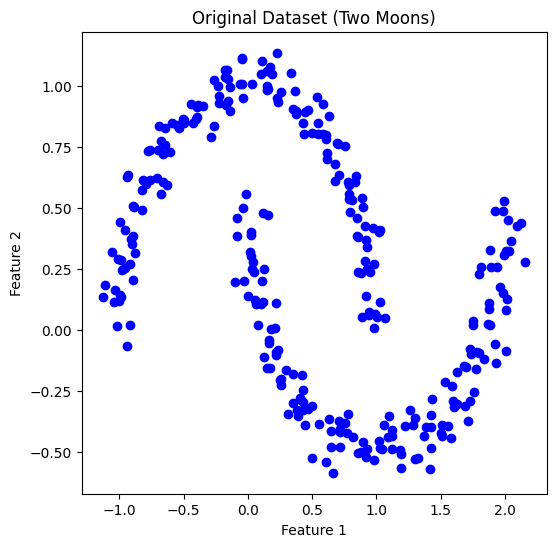

In [2]:
# কৃত্রিম ডেটাসেট তৈরি: দুটি অর্ধচন্দ্রাকার ক্লাস্টার
X, y = make_moons(n_samples=300, noise=0.06, random_state=42)

# ডেটা ভিজুয়ালাইজ করা
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.title("Original Dataset (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

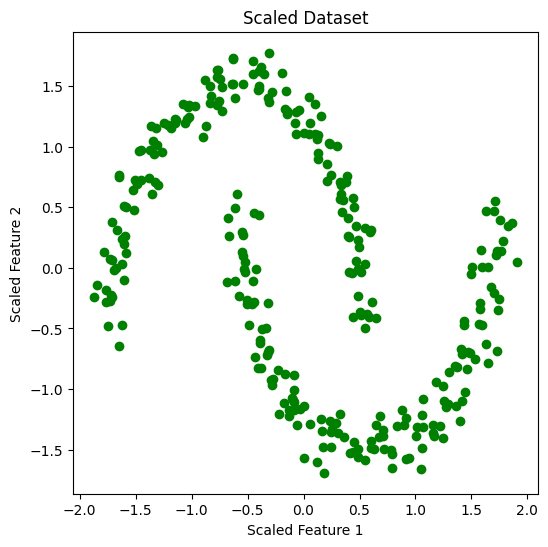

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# স্কেল করা ডেটা দেখা
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='green')
plt.title("Scaled Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.show()

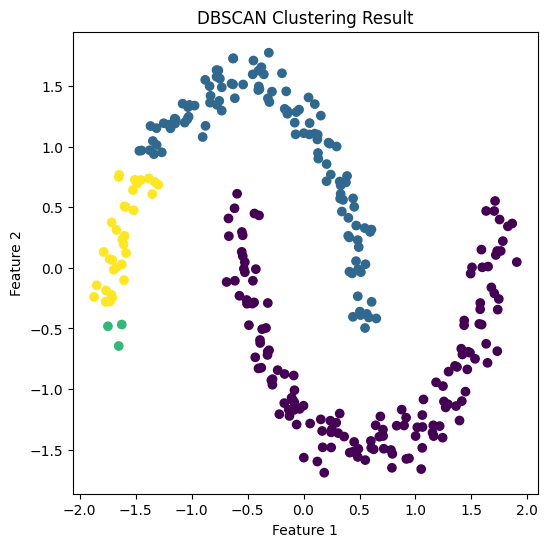

Unique cluster labels: [0 1 2 3]


In [4]:
# DBSCAN মডেল তৈরি ও ফিট
dbscan = DBSCAN(eps=0.2, min_samples=3)
db_labels = dbscan.fit_predict(X_scaled)

# ক্লাস্টার ভিজুয়ালাইজ
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=db_labels, cmap='viridis')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ক্লাস্টার লেবেল দেখা
print("Unique cluster labels:", np.unique(db_labels))

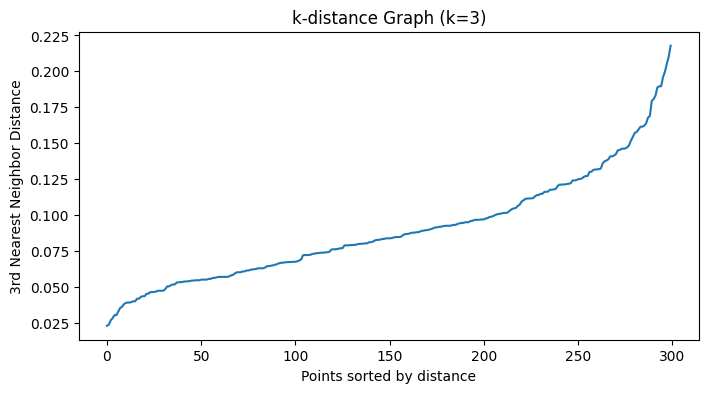

In [5]:
# k-distance plot তৈরি
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# 3rd nearest neighbor এর দূরত্ব সর্ট করা
distances = np.sort(distances[:, 2])

# গ্রাফ
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-distance Graph (k=3)")
plt.xlabel("Points sorted by distance")
plt.ylabel("3rd Nearest Neighbor Distance")
plt.show()

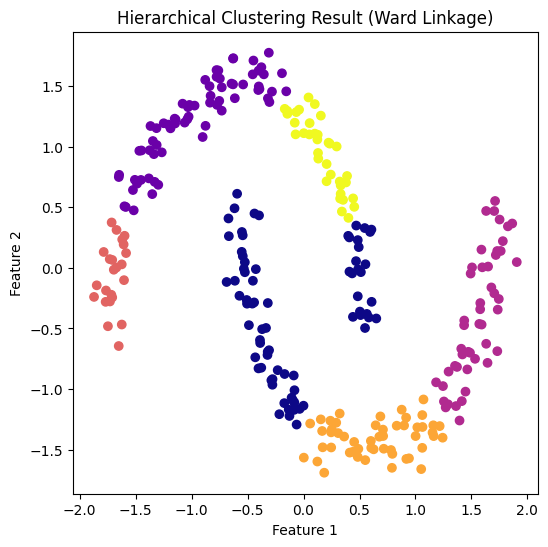

In [6]:
# Hierarchical Clustering (Ward Linkage)
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# ভিজুয়ালাইজ
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clustering Result (Ward Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

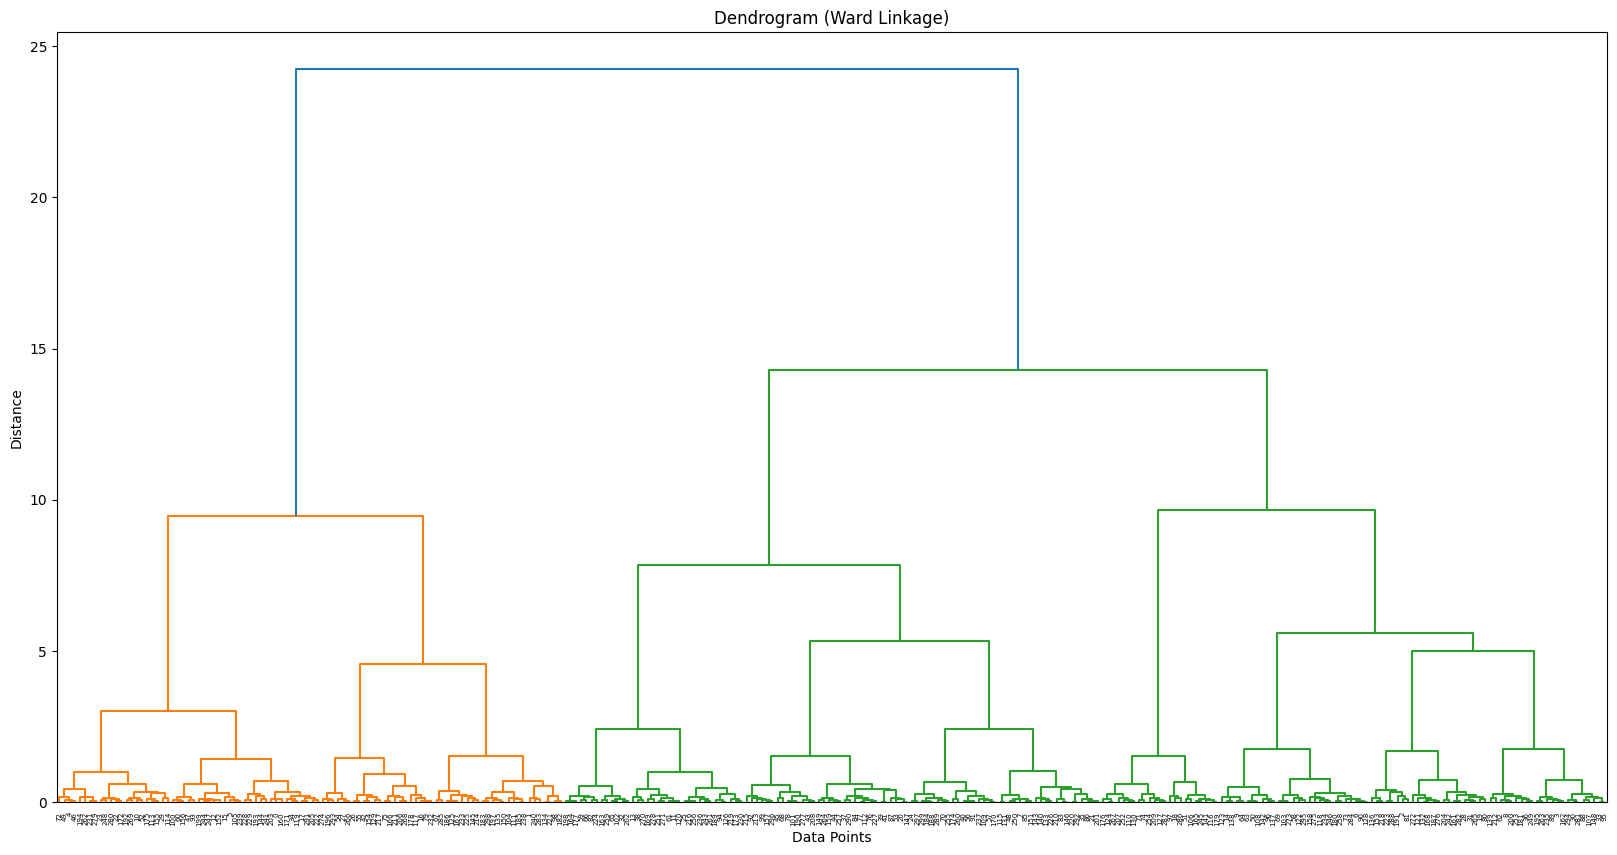

In [7]:
# Dendrogram তৈরি
linked = linkage(X_scaled, method='ward')

# Dendrogram ভিজুয়ালাইজ
plt.figure(figsize=(20, 10))
dendrogram(linked)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()